In [4]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score 

In [3]:
# Load Dataset
df = pd.read_csv('california_housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='total_rooms', ylabel='population'>

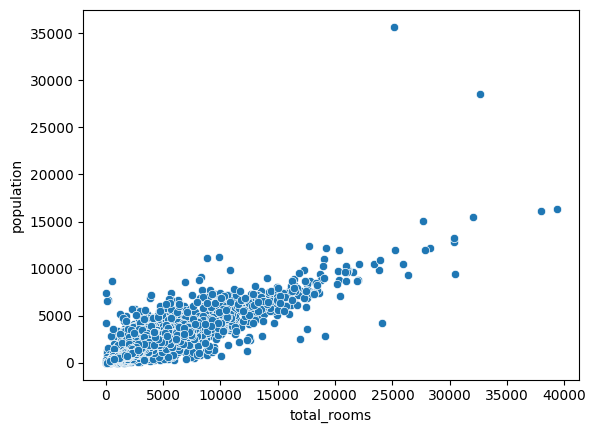

In [6]:
# scatter plot population and income
sns.scatterplot(x='total_rooms', y='population',data = df)

In [8]:
df.shape

(20640, 10)

In [27]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Let's apply Multi Linear Regression model**

### Step# Data Spliting

In [9]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [31]:
# selected columns in 'X' and population in 'y'
X = df[['longitude','latitude','housing_median_age','total_rooms',
       'households','median_income','median_house_value']]
y = df['population']

In [36]:
X_train,X_test, y_train,y_test = train_test_split(X , y , test_size=0.2 , random_state=True)
len(X_train),len(X_test), len(y_train),len(y_test)

(16512, 4128, 16512, 4128)

### Step# Linear Regression Model

In [30]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Step# Model Prediction

In [32]:
y_predict = model.predict(X_test)

### Step# Model Evaluation

In [40]:
MSE = mean_squared_error(y_test,y_predict)
print(f'Mean Squared Error: {MSE}')
r2_score = r2_score(y_test,y_predict)
print(f'R2 Score: {r2_score}')

Mean Squared Error: 194024.49131884807
R2 Score: 0.8574428203717903


**Insights: Accuracy of the model is 86%**

In [41]:

X_test['y_predict'] = y_predict
X_test['Population']  = y_test
X_test


,longitude,latitude,housing_median_age,total_rooms,households,median_income,median_house_value,y_predict,Population
4712,-118.36,34.06,39.0,2810.0,624.0,3.2500,355000.0,1503.850769,1109.0
2151,-119.78,36.78,37.0,2185.0,438.0,1.9784,70700.0,1312.666141,1143.0
15927,-122.42,37.73,46.0,1819.0,406.0,4.0132,229400.0,1122.717956,1534.0
82,-122.28,37.81,52.0,340.0,87.0,1.5208,112500.0,381.950722,200.0
8161,-118.13,33.82,37.0,1530.0,283.0,5.1795,225400.0,947.916910,711.0
...,...,...,...,...,...,...,...,...,...
2319,-119.70,36.82,25.0,2379.0,484.0,2.3173,68200.0,1428.202729,1482.0
5341,-118.44,34.04,49.0,32.0,7.0,2.1875,225000.0,99.671141,14.0
16888,-122.37,37.60,26.0,15.0,3.0,5.0480,350000.0,-105.080996,11.0
6823,-118.10,34.09,42.0,1460.0,273.0,4.8750,227300.0,876.990561,829.0
